# <div style="text-align: center;"> <span style="color: maroon; font-weight: bold;">Traffic Accidents Patterns and Analysis</span> </div> 

## 
---
**Name** : **ANJALI J**

**Company** : **Prodigy InfoTech**

**Task 5**

---

## <span style="color:red"><strong>Objective</strong></span>

#### Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

## <span style="color:red"><strong>About the Dataset</strong></span>

#### The US Car Accidents dataset typically includes information on traffic accidents across various states in the United States. It contains data that helps analyze the patterns, contributing factors, and severity of accidents. The dataset often consists of multiple features that can provide insights into the conditions surrounding traffic accidents.

## <span style="color:red"><strong>Data Description</strong></span>

#### Here's a general breakdown of the typical columns and their descriptions:
* State: The state in which the accident occurred.
* Atmospheric Condition: Describes the weather conditions at the time of the accident (e.g., clear, rain, snow).
* Crash Date: The date and time the accident occurred. It may include subcolumns like:
* Year: The year of the accident.
* Month: The month the accident occurred.
* Day-of-week: The day of the week the accident occurred.
* Day-of-month: The specific day of the month the accident occurred.
* Fatalities in Crash: The number of fatalities resulting from the crash.
* Roadway: Information about the type of roadway (e.g., highway, urban road).
* Age: The age of the individuals involved in the accident.
* Person Type: The type of person involved in the accident (e.g., driver, passenger, pedestrian).
* Drug Involvement: Indicates whether drugs were involved in the accident (e.g., no, yes).
* Gender: The gender of the individuals involved.
* Injury Severity: The severity of the injuries (e.g., fatal, serious, minor).
* Crash Location: The geographic coordinates (latitude and longitude) of the accident.
* Visibility: Visibility conditions at the time of the accident, often indicating weather-related visibility issues (e.g., fog, clear).

## <span style="color:red"><strong>Importing Libraries</strong></span>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install folium
import folium
from folium.plugins import HeatMap

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/80/12/876692c8329d3981c49f1598ba699a752750516024d1d96a66eb78f2975e/folium-0.19.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/f8/9d/91cddd38bd00170aad1a4b198c47b4ed716be45c234e09b835af41f4e717/branca-0.8.1-py3-none-any.whl.metadata
  Obtaining dependency information for xyzservices from https://files.pythonhosted.org/packages/4c/d3/e07ce413d16ef64e885bea37551eac4c5ca3ddd440933f9c94594273d0d9/xyzservices-2024.9.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/110.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/110.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/110.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/110.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/110.1 kB ? eta -:--:--
   --------------------------


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## <span style="color:red"><strong>Loading the Dataset</strong></span>

In [7]:
data = pd.read_csv('US_car accident.csv')

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State                    4999 non-null   object 
 1   Atmospheric Condition    4999 non-null   object 
 2   Crash Date               4999 non-null   object 
 3   Fatalities in crash      4999 non-null   int64  
 4   Roadway                  4999 non-null   object 
 5   Age                      4929 non-null   float64
 6   Alcohol Results          2293 non-null   float64
 7   Person Type              4999 non-null   object 
 8   Drug Involvement         4999 non-null   object 
 9   Race                     2320 non-null   object 
 10  Gender                   4999 non-null   object 
 11  Injury Severity          4999 non-null   object 
 12  Crash Date.year          4999 non-null   int64  
 13  Crash Date.month         4999 non-null   int64  
 14  Crash Date.day-of-month 

In [19]:
data.describe()

,Fatalities in crash,Age,Crash Date.year,Crash Date.month,Crash Date.day-of-month,Crash Date.day-of-week
count,4929.000000,4929.000000,4929.0,4929.000000,4929.000000,4929.000000
mean,1.138568,38.608237,2011.0,2.510448,13.686549,4.241631
std,0.425057,20.305162,0.0,2.202866,8.806597,2.010888
min,1.000000,0.000000,2011.0,1.000000,1.000000,1.000000
25%,1.000000,22.000000,2011.0,1.000000,6.000000,2.000000
50%,1.000000,36.000000,2011.0,2.000000,13.000000,4.000000
75%,1.000000,53.000000,2011.0,3.000000,21.000000,6.000000
max,5.000000,98.000000,2011.0,12.000000,31.000000,7.000000


## <span style="color:red"><strong>Overview of the Dataset</strong></span>

In [9]:
data.shape

(4999, 16)

In [18]:
data.columns

Index(['State', 'Atmospheric Condition', 'Crash Date', 'Fatalities in crash',
       'Roadway', 'Age', 'Person Type', 'Drug Involvement', 'Gender',
       'Injury Severity', 'Crash Date.year', 'Crash Date.month',
       'Crash Date.day-of-month', 'Crash Date.day-of-week'],
      dtype='object')

In [8]:
print(data.head())

     State Atmospheric Condition  Crash Date  Fatalities in crash  \
0   Alaska                 Clear  2011-01-05                    1   
1   Alaska                 Clear  2011-01-05                    1   
2  Arizona                 Clear  2011-01-01                    1   
3  Arizona                 Clear  2011-01-01                    1   
4  Arizona                 Clear  2011-01-01                    1   

                               Roadway   Age  Alcohol Results  \
0  Rural-Principal Arterial-Interstate  27.0              0.0   
1  Rural-Principal Arterial-Interstate  60.0              0.0   
2       Urban-Other Principal Arterial  24.0              NaN   
3       Urban-Other Principal Arterial  27.0              0.0   
4       Urban-Other Principal Arterial  82.0              0.0   

                                 Person Type Drug Involvement     Race  \
0     Driver of a Motor Vehicle In-Transport              Yes      NaN   
1     Driver of a Motor Vehicle In-Transport  

In [10]:
data.isnull().sum()

State                         0
Atmospheric Condition         0
Crash Date                    0
Fatalities in crash           0
Roadway                       0
Age                          70
Alcohol Results            2706
Person Type                   0
Drug Involvement              0
Race                       2679
Gender                        0
Injury Severity               0
Crash Date.year               0
Crash Date.month              0
Crash Date.day-of-month       0
Crash Date.day-of-week        0
dtype: int64

In [11]:
data.duplicated().sum()

0

## <span style="color:red"><strong>Data Preprocessing</strong></span>

In [15]:
data=data.drop(columns=['Alcohol Results','Race'])

In [16]:
data=data.dropna()

In [21]:
# Fill missing values in key columns (if necessary)
data['Atmospheric Condition'].fillna('Unknown', inplace=True)

C:\Users\gokul\AppData\Local\Temp\ipykernel_13808\2232097690.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Atmospheric Condition'].fillna('Unknown', inplace=True)


In [17]:
data.shape

(4929, 14)

## <span style="color:red"><strong>Analyzing Patterns</strong></span>

### **Accidents by Atmospheric Conditions**

C:\Users\gokul\AppData\Local\Temp\ipykernel_13808\690998522.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_weather_conditions.index, y=top_weather_conditions.values, palette='viridis')


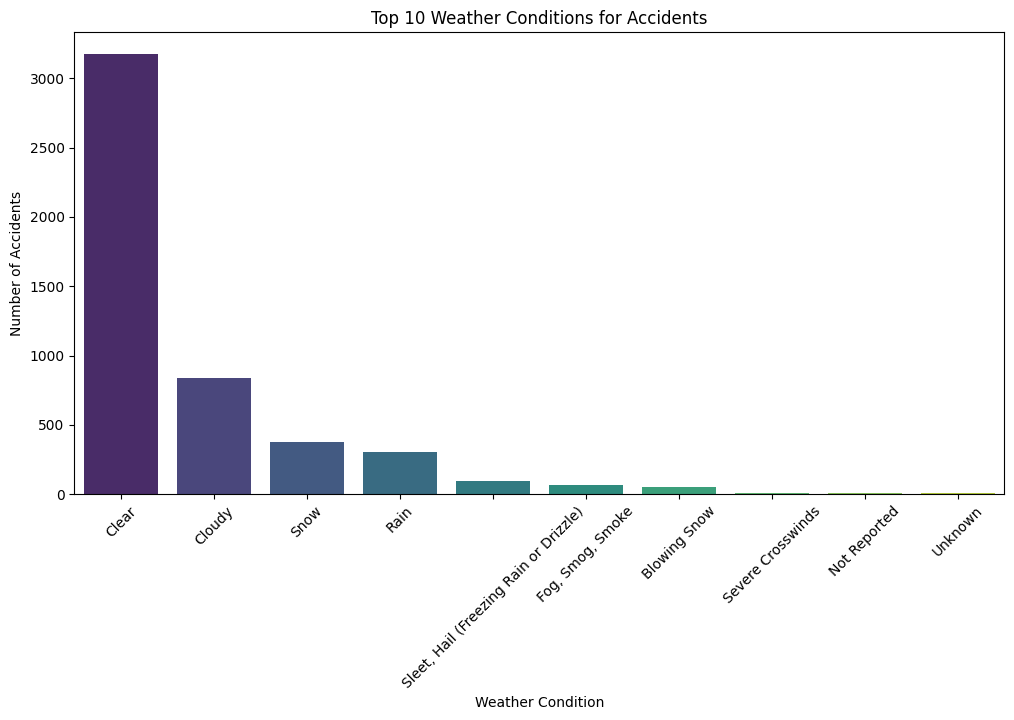

In [22]:
top_weather_conditions = data['Atmospheric Condition'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_weather_conditions.index, y=top_weather_conditions.values, palette='viridis')
plt.title('Top 10 Weather Conditions for Accidents')
plt.xlabel('AtmosphericRoad Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

### **Accidents by Roadway**

C:\Users\gokul\AppData\Local\Temp\ipykernel_13808\1974615320.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_roadways.index, y=top_weather_conditions.values, palette='viridis')


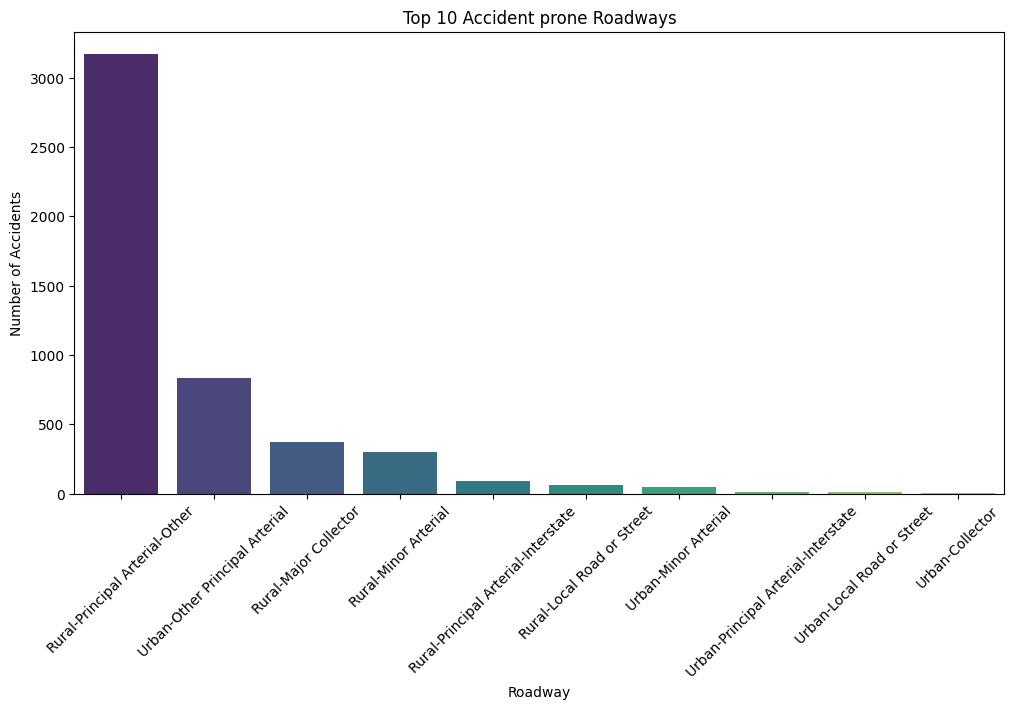

In [25]:
top_roadways = data['Roadway'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_roadways.index, y=top_weather_conditions.values, palette='viridis')
plt.title('Top 10 Accident prone Roadways')
plt.xlabel('Roadway')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

#### Most of the accidents are reported in Rural-Principal Arterial_Other.

### **Accidents by Day of Week**

C:\Users\gokul\AppData\Local\Temp\ipykernel_13808\532958556.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Day_of_Week', data=data, order=['Monday', 'Tuesday', 'Wednesday',


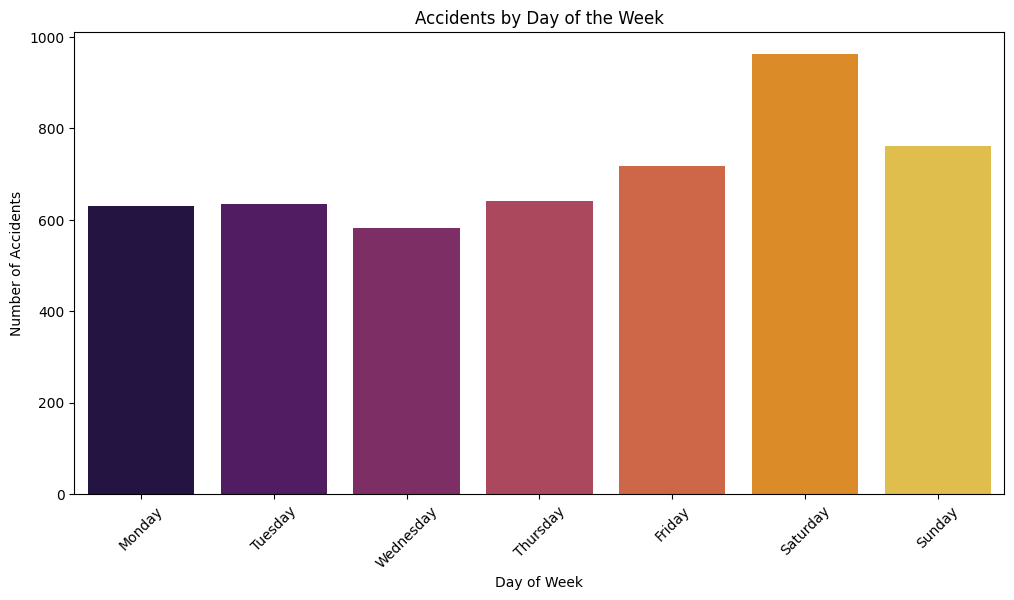

In [40]:
# Map numbers to day names
day_mapping = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 
               5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
data['Day_of_Week'] = data['Crash Date.day-of-week'].map(day_mapping)

# Plot the count of accidents by day of the week
plt.figure(figsize=(12, 6))
sns.countplot(x='Day_of_Week', data=data, order=['Monday', 'Tuesday', 'Wednesday', 
                                                 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='inferno')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

#### Most of the accidents happened in Saturday.

### **Accidents by Drug Involvement**

C:\Users\gokul\AppData\Local\Temp\ipykernel_13808\2223658962.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=drug_counts.index, y=drug_counts.values, palette="plasma")


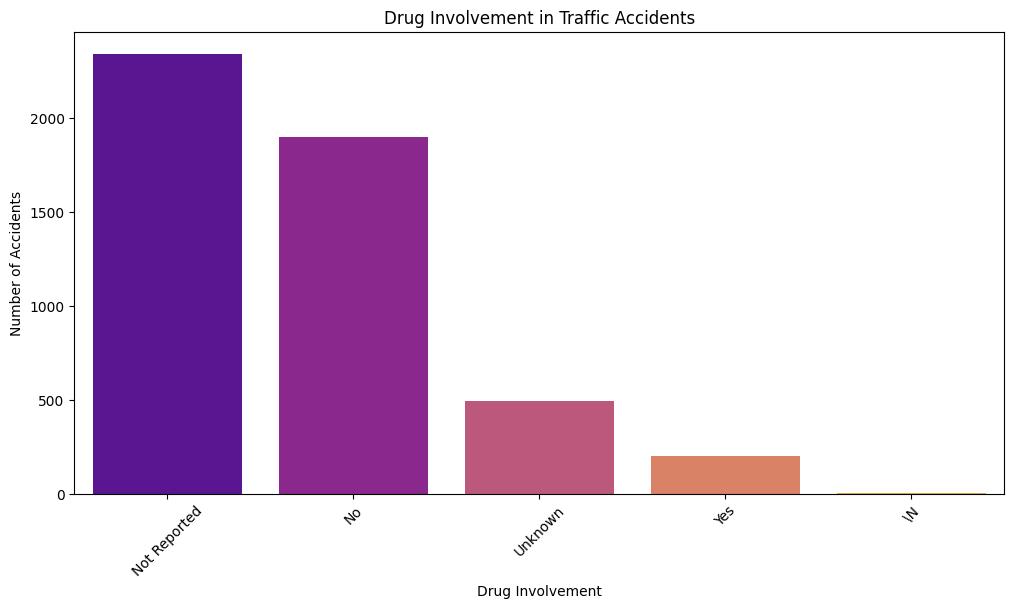

In [39]:
drug_counts = data['Drug Involvement'].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=drug_counts.index, y=drug_counts.values, palette="plasma")
plt.title('Drug Involvement in Traffic Accidents')
plt.xlabel('Drug Involvement')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

#### In most of the accidents, drug involvement is not reported.

### **Accidents by Age**

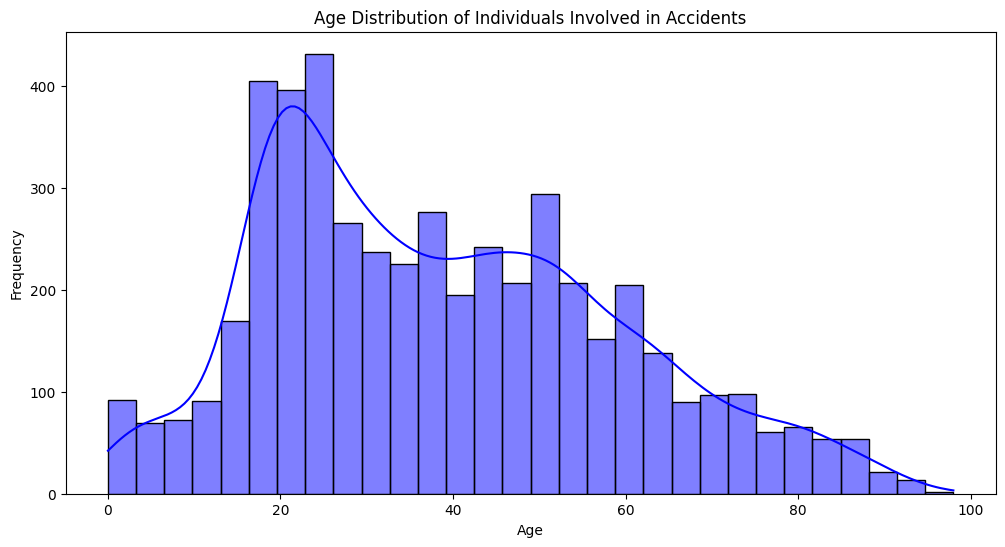

In [29]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution of Individuals Involved in Accidents')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Age of people involved in accidents lie between 18 and 50 years.

### **Accidents by Gender**

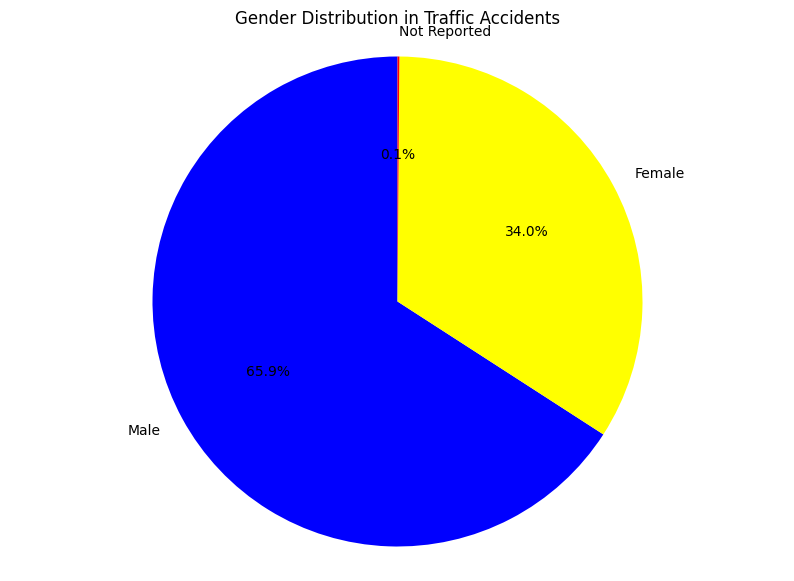

In [33]:
gender_counts = data['Gender'].value_counts()

# Plot a pie chart
plt.figure(figsize=(10, 7))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'yellow', 'red'])
plt.title('Gender Distribution in Traffic Accidents')
plt.axis('equal')  # Ensures the pie is a circle
plt.show()

#### Mostly men are involved in accidents.

### **Map Accident Hotspot by State**

C:\Users\gokul\AppData\Local\Temp\ipykernel_13808\3004794837.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette='coolwarm')


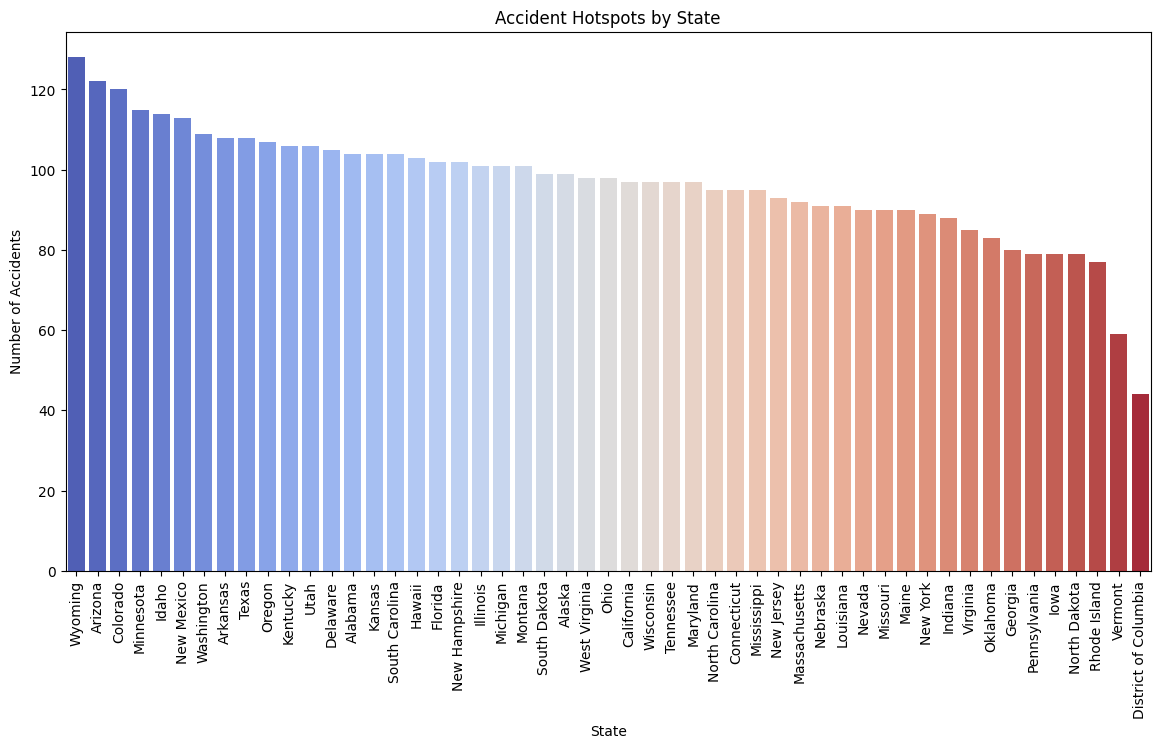

In [38]:
state_counts = data['State'].value_counts()

# Plot accident hotspots by state
plt.figure(figsize=(14, 7))
sns.barplot(x=state_counts.index, y=state_counts.values, palette='coolwarm')
plt.title('Accident Hotspots by State')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.show()

#### Most accidents are reported in Wyoming.

### **Gender and Injury Severity**

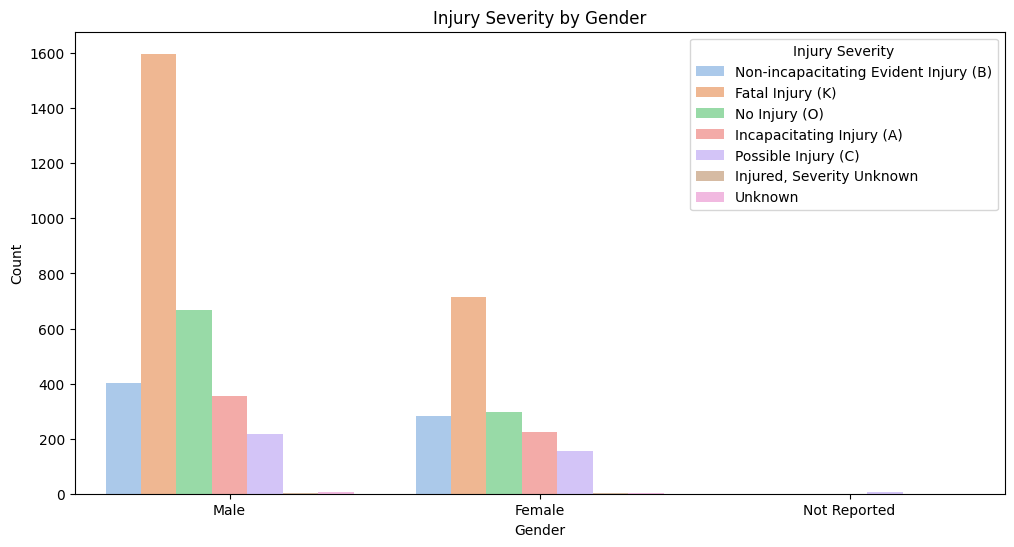

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Gender', hue='Injury Severity', palette='pastel')
plt.title('Injury Severity by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Injury Severity')
plt.show()

#### Fatal Injuries are more for men.
                       

### **Person Type in Accidents**

C:\Users\gokul\AppData\Local\Temp\ipykernel_13808\2924275008.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=person_counts.index, y=person_counts.values, palette='cool')


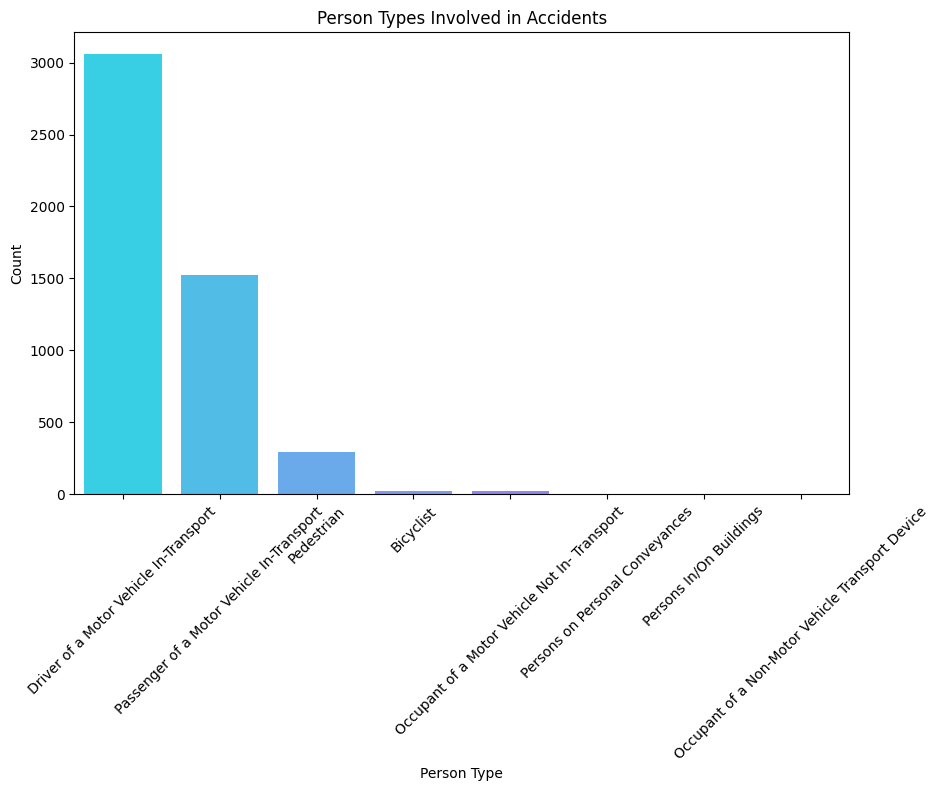

In [37]:
person_counts = data['Person Type'].value_counts()

# Plot person types
plt.figure(figsize=(10, 6))
sns.barplot(x=person_counts.index, y=person_counts.values, palette='cool')
plt.title('Person Types Involved in Accidents')
plt.xlabel('Person Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Drivers of motor vehicle in transport are more prone to accidents.